## Linear Fits

### Average Temperature

The rate of change of the annual average temperature is 0.00947 ± 0.00102 °C
95% Confidence Interval for the slope: (0.01, 0.01) °C
T statistic 9.287866767400489
P-value 4.440892098500626e-16
Z-score 9.287866767400489


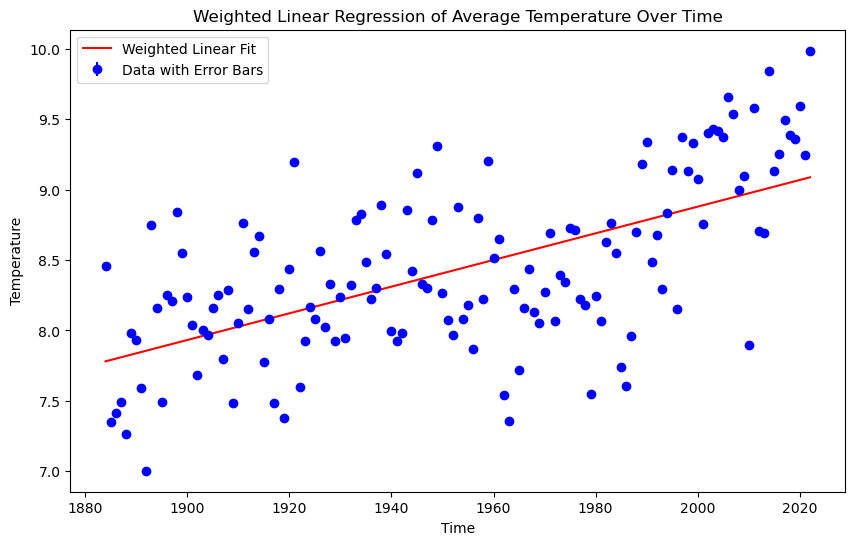

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import statsmodels.api as sm
from scipy import stats

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

tas_array = np.array(data['tas'])
time = np.arange(1884, 2023)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))
temp = np.nanmean(temp, axis=(1, 2))
err = 0.001

X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression with weights (inverse of the square of error)
weights = 1 / np.square(err)
model = sm.WLS(temp, X_with_constant, weights=weights)
results = model.fit()

# Extracting information from the weighted regression results
slope = results.params[1]  # Index 1 corresponds to the slope coefficient
intercept = results.params[0]  # Index 0 corresponds to the intercept
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f'The rate of change of the annual average temperature is {slope:.5f} ± {slope_error:.5f} °C')
conf_int = results.conf_int(alpha=0.05)  
lower_bound, upper_bound = conf_int[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound:.2f}, {upper_bound:.2f}) °C')

# Calculate t-statistic, p-value, and z-score
t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))
slope = results.params[1]
null_hypothesis_value = 0
z_score = (slope - null_hypothesis_value) / results.bse[1]

print('T statistic', t_statistic)
print('P-value', p_value)
print('Z-score', z_score)

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, temp, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line
plt.plot(time, results.fittedvalues, color='red', label='Weighted Linear Fit')

plt.title('Weighted Linear Regression of Average Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


### Average Maximum Temperature

The rate of change of the annual average temperature is 0.00883 ± 0.00119 °C
95% Confidence Interval for the slope: (0.01, 0.01) °C
T statistic 7.442632347835003
P-value 9.866552019843766e-12
Z-score 7.442632347835003


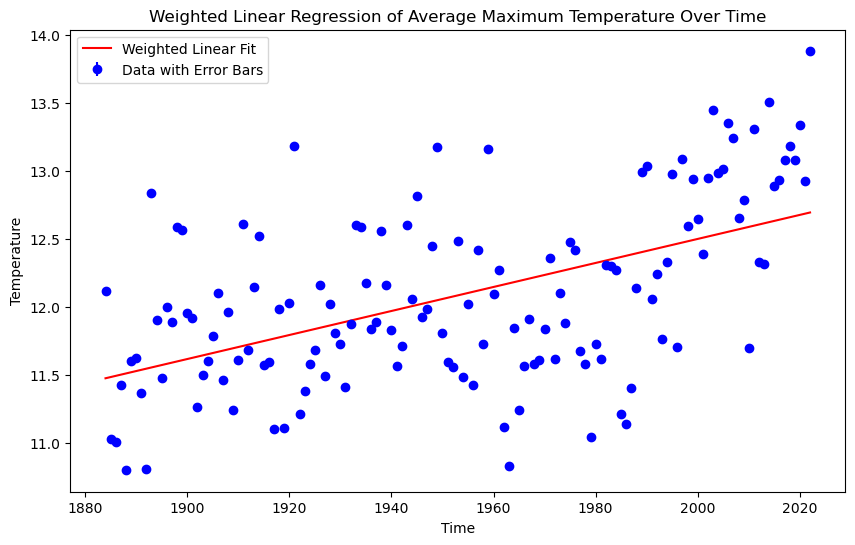

In [7]:
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmax\*.nc", parallel=True)

# Extract variables
tas_array = np.array(data['tasmax'])
time = np.arange(1884, 2023)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))
temp = np.nanmean(temp, axis=(1, 2))
err = 0.002

X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression
weights = 1 / np.square(err)
model = sm.WLS(temp, X_with_constant, weights=weights)
results = model.fit()

# Extracting information from the regression results
slope = results.params[1]  # Index 1 corresponds to the slope coefficient
intercept = results.params[0]  # Index 0 corresponds to the intercept
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f'The rate of change of the annual average temperature is {slope:.5f} ± {slope_error:.5f} °C')
conf_int = results.conf_int(alpha=0.05)  
lower_bound, upper_bound = conf_int[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound:.2f}, {upper_bound:.2f}) °C')

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

slope = results.params[1]
null_hypothesis_value = 0
z_score = (slope - null_hypothesis_value) / results.bse[1]

print('T statistic', t_statistic)
print('P-value', p_value)
print('Z-score', z_score)

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, temp, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line
plt.plot(time, results.fittedvalues, color='red', label='Weighted Linear Fit')

plt.title('Weighted Linear Regression of Average Maximum Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


### Average Minimum Temperature

The rate of change of the annual average temperature is 0.01005 ± 0.00092 °C
95% Confidence Interval for the slope: (0.01, 0.01) °C
T statistic 10.94434979335672
P-value 0.0
Z-score 10.94434979335672


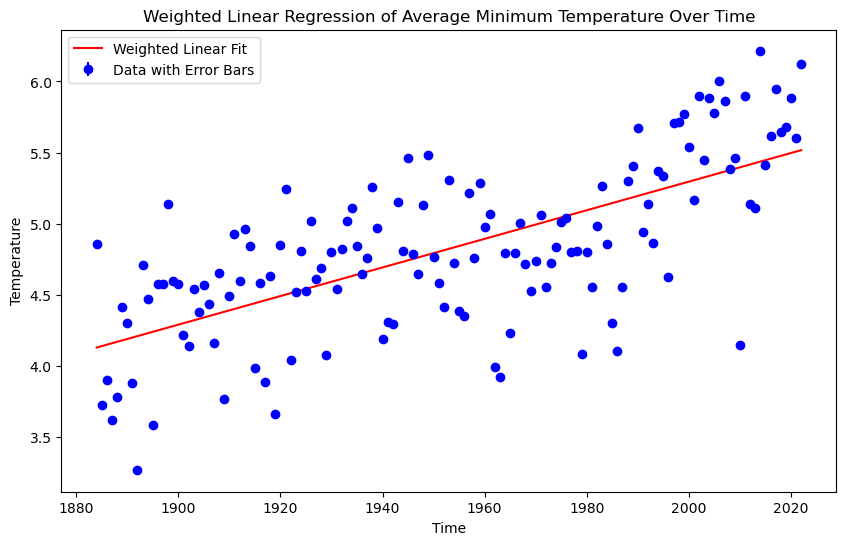

In [8]:
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmin\*.nc", parallel=True)

# Extract variables
tas_array = np.array(data['tasmin'])
time = np.arange(1884, 2023)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))

temp = np.nanmean(temp, axis=(1, 2))
err = 0.002

X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression
weights = 1 / np.square(err)
model = sm.WLS(temp, X_with_constant, weights=weights)
results = model.fit()

# Extracting information from the regression results
slope = results.params[1]  # Index 1 corresponds to the slope coefficient
intercept = results.params[0]  # Index 0 corresponds to the intercept
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f'The rate of change of the annual average temperature is {slope:.5f} ± {slope_error:.5f} °C')
conf_int = results.conf_int(alpha=0.05)  
lower_bound, upper_bound = conf_int[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound:.2f}, {upper_bound:.2f}) °C')

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

slope = results.params[1]
null_hypothesis_value = 0
z_score = (slope - null_hypothesis_value) / results.bse[1]

print('T statistic', t_statistic)
print('P-value', p_value)
print('Z-score', z_score)

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, temp, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line
plt.plot(time, results.fittedvalues, color='red', label='Weighted Linear Fit')

plt.title('Weighted Linear Regression of Average Minimum Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


### Average Rainfall

The rate of change of the annual average rainfall is 0.07027 ± 0.01249 mm
95% Confidence Interval for the slope: (0.05, 0.09) mm
T statistic 5.626579129981971
P-value 9.971174574907593e-08
Z-score 5.626579129981971


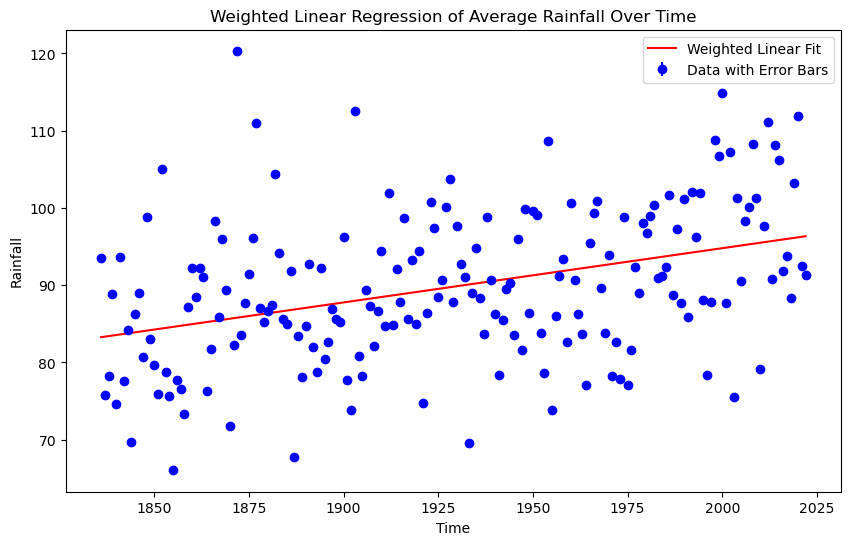

In [10]:
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)

# Extract variables
rain_array = np.array(data['rainfall'])
time = np.arange(1836, 2023)
rain = block_reduce(rain_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(rain_array))
rain = np.nanmean(rain, axis=(1, 2))
err= 0.057

X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression
weights = 1 / np.square(err)
model = sm.WLS(rain, X_with_constant, weights=weights)
results = model.fit()

# Extracting information from the regression results
slope = results.params[1]  # Index 1 corresponds to the slope coefficient
intercept = results.params[0]  # Index 0 corresponds to the intercept
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f'The rate of change of the annual average rainfall is {slope:.5f} ± {slope_error:.5f} mm')
conf_int = results.conf_int(alpha=0.05)  
lower_bound, upper_bound = conf_int[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound:.2f}, {upper_bound:.2f}) mm')

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

slope = results.params[1]
null_hypothesis_value = 0
z_score = (slope - null_hypothesis_value) / results.bse[1]

print('T statistic', t_statistic)
print('P-value', p_value)
print('Z-score', z_score)

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, rain, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line
plt.plot(time, results.fittedvalues, color='red', label='Weighted Linear Fit')

plt.title('Weighted Linear Regression of Average Rainfall Over Time')
plt.xlabel('Time')
plt.ylabel('Rainfall')
plt.legend()
plt.show()


### Winter Rainfall

The rate of change of the annual average rainfall is 0.44121 ± 0.09471 mm
95% Confidence Interval for the slope: (0.25, 0.63) mm
T statistic 4.658682828528573
P-value 7.449749372945291e-06
Z-score 4.658682828528573


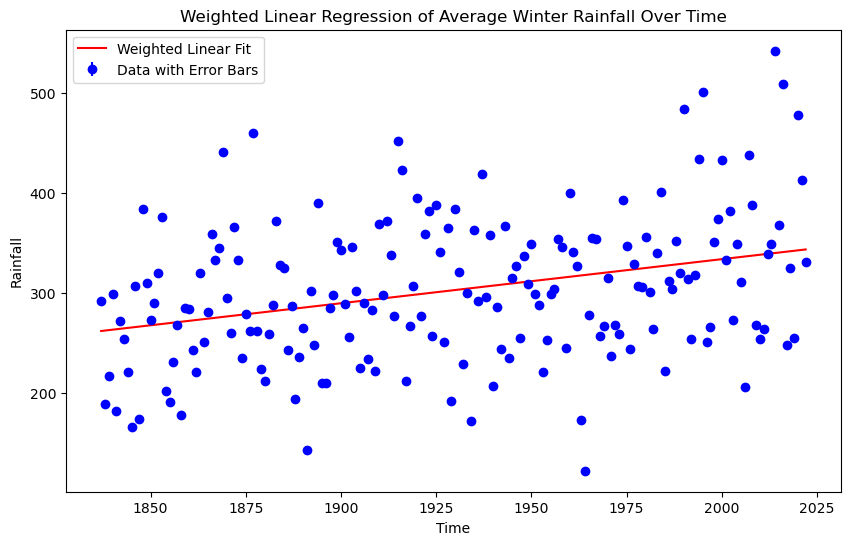

In [15]:
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Season_Rain\*.nc", parallel=True)

rain = np.array(data['rainfall'])
rain = np.nanmean(rain, axis=(1, 2))
time = np.arange(1837, 2023)
rain = rain[3::4]
err= 0.057

X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression
weights = 1 / np.square(err)
model = sm.WLS(rain, X_with_constant, weights=weights)
results = model.fit()

# Extracting information from the regression results
slope = results.params[1]  # Index 1 corresponds to the slope coefficient
intercept = results.params[0]  # Index 0 corresponds to the intercept
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f'The rate of change of the annual average rainfall is {slope:.5f} ± {slope_error:.5f} mm')
conf_int = results.conf_int(alpha=0.05)  
lower_bound, upper_bound = conf_int[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound:.2f}, {upper_bound:.2f}) mm')

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

slope = results.params[1]
null_hypothesis_value = 0
z_score = (slope - null_hypothesis_value) / results.bse[1]

print('T statistic', t_statistic)
print('P-value', p_value)
print('Z-score', z_score)

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, rain, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line
plt.plot(time, results.fittedvalues, color='red', label='Weighted Linear Fit')

plt.title('Weighted Linear Regression of Average Winter Rainfall Over Time')
plt.xlabel('Time')
plt.ylabel('Rainfall')
plt.legend()
plt.show()


### Spring Rainfall

The rate of change of the annual average rainfall is 0.23438 ± 0.05587 mm
95% Confidence Interval for the slope: (0.12, 0.34) mm
T statistic 4.195293089863696
P-value 4.8686899452254906e-05
Z-score 4.195293089863696


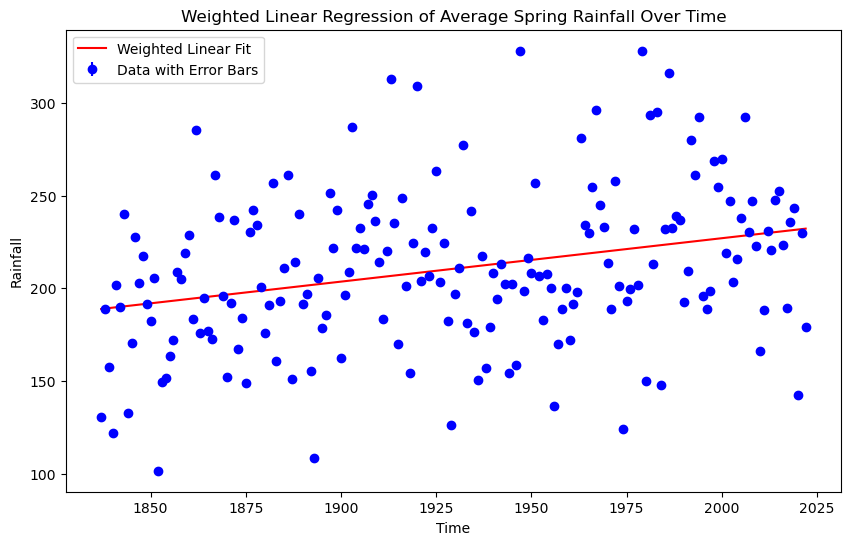

In [17]:
rain = np.array(data['rainfall'])
rain = np.nanmean(rain, axis=(1, 2))
time = np.arange(1837, 2023)
rain = rain[4::4]

err= 0.057

X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression
weights = 1 / np.square(err)
model = sm.WLS(rain, X_with_constant, weights=weights)
results = model.fit()

# Extracting information from the regression results
slope = results.params[1]  # Index 1 corresponds to the slope coefficient
intercept = results.params[0]  # Index 0 corresponds to the intercept
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f'The rate of change of the annual average rainfall is {slope:.5f} ± {slope_error:.5f} mm')
conf_int = results.conf_int(alpha=0.05)  
lower_bound, upper_bound = conf_int[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound:.2f}, {upper_bound:.2f}) mm')

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

slope = results.params[1]
null_hypothesis_value = 0
z_score = (slope - null_hypothesis_value) / results.bse[1]

print('T statistic', t_statistic)
print('P-value', p_value)
print('Z-score', z_score)

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, rain, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line
plt.plot(time, results.fittedvalues, color='red', label='Weighted Linear Fit')

plt.title('Weighted Linear Regression of Average Spring Rainfall Over Time')
plt.xlabel('Time')
plt.ylabel('Rainfall')
plt.legend()
plt.show()


### Summer Rainfall 

The rate of change of the annual average rainfall is -0.06041 ± 0.07487 mm
95% Confidence Interval for the slope: (-0.21, 0.09) mm
T statistic -0.8068689367916972
P-value 0.4211405359701499
Z-score -0.8068689367916972


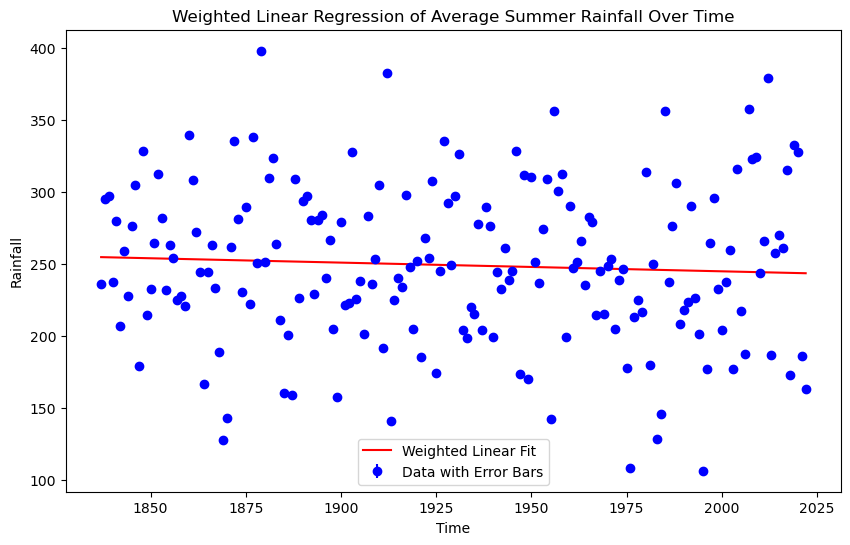

In [19]:
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Season_Rain\*.nc", parallel=True)

rain = np.array(data['rainfall'])
rain = np.nanmean(rain, axis=(1, 2))
rain = rain[5::4]

err= 0.057

X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression
weights = 1 / np.square(err)
model = sm.WLS(rain, X_with_constant, weights=weights)
results = model.fit()

# Extracting information from the regression results
slope = results.params[1]  # Index 1 corresponds to the slope coefficient
intercept = results.params[0]  # Index 0 corresponds to the intercept
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f'The rate of change of the annual average rainfall is {slope:.5f} ± {slope_error:.5f} mm')
conf_int = results.conf_int(alpha=0.05)  
lower_bound, upper_bound = conf_int[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound:.2f}, {upper_bound:.2f}) mm')

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

slope = results.params[1]
null_hypothesis_value = 0
z_score = (slope - null_hypothesis_value) / results.bse[1]

print('T statistic', t_statistic)
print('P-value', p_value)
print('Z-score', z_score)

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, rain, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line
plt.plot(time, results.fittedvalues, color='red', label='Weighted Linear Fit')

plt.title('Weighted Linear Regression of Average Summer Rainfall Over Time')
plt.xlabel('Time')
plt.ylabel('Rainfall')
plt.legend()
plt.show()

### Autumn Rainfall

The rate of change of the annual average rainfall is 0.24983 ± 0.08132 mm
95% Confidence Interval for the slope: (0.09, 0.41) mm
T statistic 3.072426416791955
P-value 0.002562080372071618
Z-score 3.072426416791955


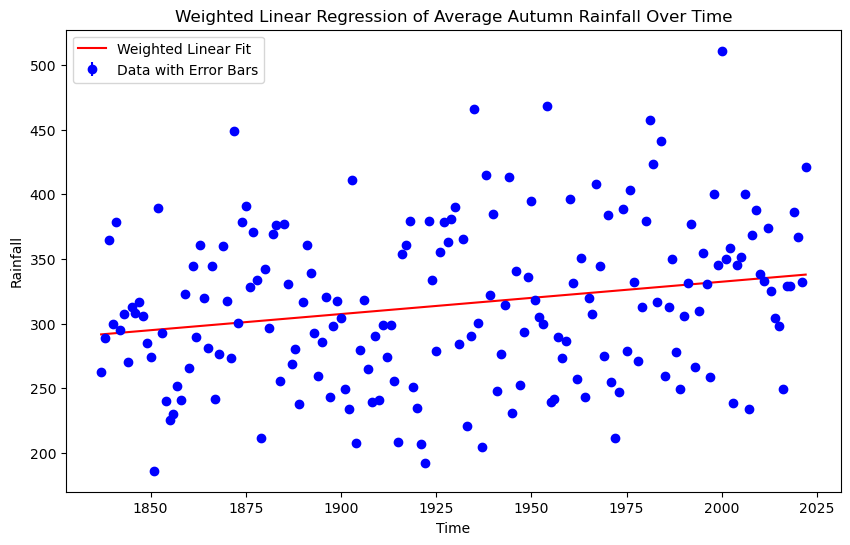

In [20]:
rain = np.array(data['rainfall'])
rain = np.nanmean(rain, axis=(1, 2))
rain = rain[6::4]

err= 0.057

X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression
weights = 1 / np.square(err)
model = sm.WLS(rain, X_with_constant, weights=weights)
results = model.fit()

# Extracting information from the regression results
slope = results.params[1]  # Index 1 corresponds to the slope coefficient
intercept = results.params[0]  # Index 0 corresponds to the intercept
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f'The rate of change of the annual average rainfall is {slope:.5f} ± {slope_error:.5f} mm')
conf_int = results.conf_int(alpha=0.05)  
lower_bound, upper_bound = conf_int[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound:.2f}, {upper_bound:.2f}) mm')

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

slope = results.params[1]
null_hypothesis_value = 0
z_score = (slope - null_hypothesis_value) / results.bse[1]

print('T statistic', t_statistic)
print('P-value', p_value)
print('Z-score', z_score)

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, rain, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line
plt.plot(time, results.fittedvalues, color='red', label='Weighted Linear Fit')

plt.title('Weighted Linear Regression of Average Autumn Rainfall Over Time')
plt.xlabel('Time')
plt.ylabel('Rainfall')
plt.legend()
plt.show()

### Average Wind Speed

The rate of change of the annual average wind speed is -0.00859 ± 0.00191 m/s
95% Confidence Interval for the slope: (-0.01, -0.00) m/s
T statistic -4.488607035770306
P-value 1.5064766546224462e-05
Z-score -4.488607035770306


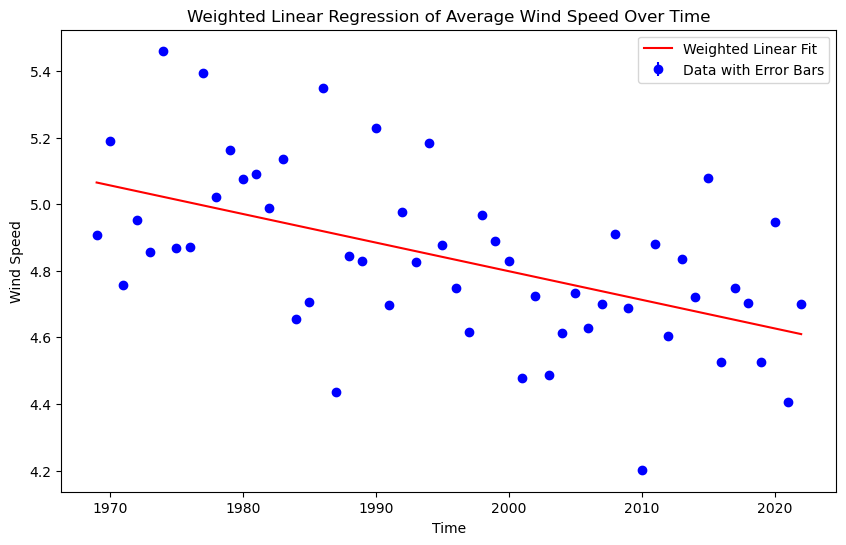

In [22]:
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Wind\*.nc", parallel=True)

# Extract variables
wind_array = np.array(data['sfcWind'])
time = np.arange(1969, 2023)
wind = block_reduce(wind_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(wind_array))
wind = np.nanmean(wind, axis=(1, 2))


err= 0.002

X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression
weights = 1 / np.square(err)
model = sm.WLS(wind, X_with_constant, weights=weights)
results = model.fit()

# Extracting information from the regression results
slope = results.params[1]  # Index 1 corresponds to the slope coefficient
intercept = results.params[0]  # Index 0 corresponds to the intercept
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f'The rate of change of the annual average wind speed is {slope:.5f} ± {slope_error:.5f} m/s')
conf_int = results.conf_int(alpha=0.05)  
lower_bound, upper_bound = conf_int[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound:.2f}, {upper_bound:.2f}) m/s')

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

slope = results.params[1]
null_hypothesis_value = 0
z_score = (slope - null_hypothesis_value) / results.bse[1]

print('T statistic', t_statistic)
print('P-value', p_value)
print('Z-score', z_score)

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, wind, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line
plt.plot(time, results.fittedvalues, color='red', label='Weighted Linear Fit')

plt.title('Weighted Linear Regression of Average Wind Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

## North vs South

### Temperature

The rate of change of the annual northern temperature is 0.00941 ± 0.00101 °C
95% Confidence Interval for the slope: (0.01, 0.01) °C
T statistic North 9.287589188812484
P-value North 4.440892098500626e-16
Z-score North 9.287589188812484
The rate of change of the annual southern temperature is 0.01056 ± 0.00110 °C
95% Confidence Interval for the slope: (0.01, 0.01) °C
T statistic South 9.587600054341191
P-value South 0.0
Z-score South 9.587600054341191


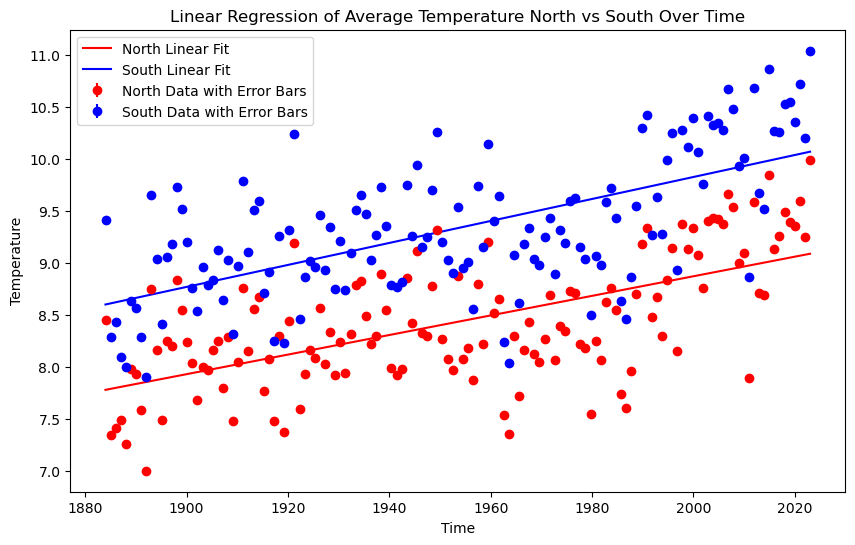

In [11]:
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

tas_array = np.array(data['tas'])
lat = np.array(data['latitude'])
err= 0.001

northern_lat_threshold = 54.0
northern_lat_index = np.where(lat >= northern_lat_threshold)[0][0]

num_years = 1668 // 12
temp_reshaped = tas_array[:num_years * 12].reshape(num_years, 12, -1)  

temp_mean_north = np.nanmean(temp_reshaped[:, :, northern_lat_index:], axis=(1, 2))

time = np.linspace(1884,2023, 139)

# Define the latitude threshold for southern U.K.
southern_lat_threshold = 54.0

# Find the index where latitude crosses the threshold
southern_lat_index = np.where(lat >= southern_lat_threshold)[0][0]

# Calculate the mean temperature for each year in the southern U.K.
temp_mean_south = np.empty(num_years)
for i in range(num_years):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    temp_year = tas_array[start_idx:end_idx, :southern_lat_index, :]
    temp_mean_south[i] = np.nanmean(temp_year)
    
X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression
weights = 1 / np.square(err)
model_north = sm.WLS(temp_mean_north, X_with_constant, weights=weights)
results_north = model_north.fit()

# Extracting information from the regression results
slope_north = results_north.params[1]  # Index 1 corresponds to the slope coefficient
intercept_north = results_north.params[0]  # Index 0 corresponds to the intercept
slope_error_north = results_north.bse[1]
intercept_error_north = results_north.bse[0]

print(f'The rate of change of the annual northern temperature is {slope_north:.5f} ± {slope_error_north:.5f} °C')
conf_int_north = results_north.conf_int(alpha=0.05)  
lower_bound_north, upper_bound_north = conf_int_north[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound_north:.2f}, {upper_bound_north:.2f}) °C')

# Printing results
t_statistic_north = results_north.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_north = len(temp_mean_north)- 2
p_value_north = 2 * (1 - stats.t.cdf(np.abs(t_statistic_north), df=degrees_of_freedom_north))

null_hypothesis_value = 0
z_score_north = (slope_north - null_hypothesis_value) / results_north.bse[1]

print('T statistic North', t_statistic_north)
print('P-value North', p_value_north)
print('Z-score North', z_score_north)


# Performing Ordinary Least Squares regression
weights = 1 / np.square(err)
model_south = sm.WLS(temp_mean_south, X_with_constant, weights=weights)
results_south = model_south.fit()

# Extracting information from the regression results
slope_south = results_south.params[1]  # Index 1 corresponds to the slope coefficient
intercept_south = results_south.params[0]  # Index 0 corresponds to the intercept
slope_error_south = results_south.bse[1]
intercept_error_south = results_south.bse[0]

print(f'The rate of change of the annual southern temperature is {slope_south:.5f} ± {slope_error_south:.5f} °C')
conf_int_south = results_south.conf_int(alpha=0.05)  
lower_bound_south, upper_bound_south = conf_int_south[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound_south:.2f}, {upper_bound_south:.2f}) °C')

# Printing results
t_statistic_south = results_south.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_south = len(temp_mean_south)- 2
p_value_south = 2 * (1 - stats.t.cdf(np.abs(t_statistic_south), df=degrees_of_freedom_south))

null_hypothesis_value = 0
z_score_south = (slope_south - null_hypothesis_value) / results_south.bse[1]

print('T statistic South', t_statistic_south)
print('P-value South', p_value_south)
print('Z-score South', z_score_south)


plt.figure(figsize=(10, 6))

# Scatter plot of the data
plt.errorbar(time, temp_mean_north, yerr=err, fmt='o', color='red', label='North Data with Error Bars')

# Plotting the regression line
plt.plot(time, results_north.fittedvalues, color='red', label='North Linear Fit')

plt.errorbar(time, temp_mean_south, yerr=err, fmt='o', color='blue', label='South Data with Error Bars')

# Plotting the regression line
plt.plot(time, results_south.fittedvalues, color='blue', label='South Linear Fit')


plt.title('Linear Regression of Average Temperature North vs South Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

### Rainfall

The rate of change of the annual northern rainfall is 0.06989 ± 0.01242 mm
95% Confidence Interval for the slope: (0.05, 0.09) mm
T statistic North 5.626579129981945
P-value North 6.712817746112876e-08
Z-score North 5.626579129981945
The rate of change of the annual southern rainfall is 0.03400 ± 0.01289 mm
95% Confidence Interval for the slope: (0.01, 0.06) mm
T statistic South 2.6388673665961413
P-value South 0.009027556570300854
Z-score South 2.6388673665961413


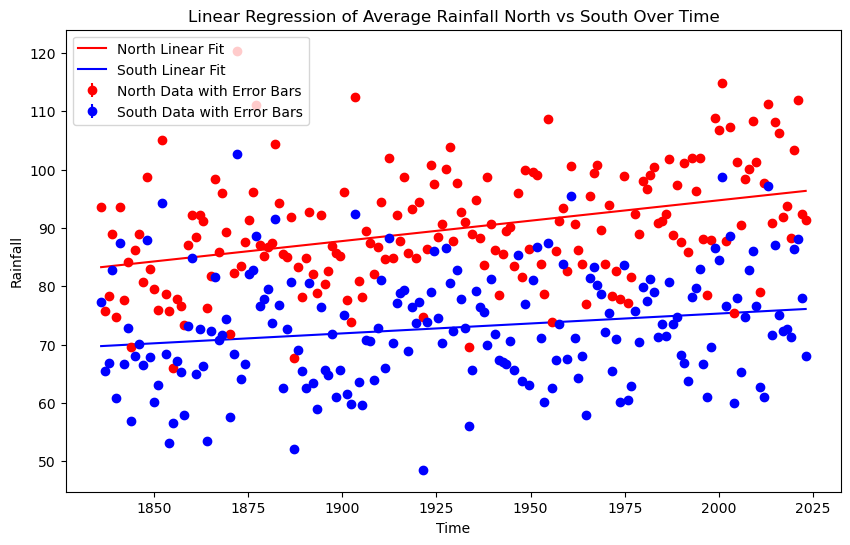

In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import statsmodels.api as sm
from scipy import stats

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)

rain = np.array(data['rainfall'])
lat = np.array(data['latitude'])
err = 0.057

northern_lat_threshold = 54.0
northern_lat_index = np.where(lat >= northern_lat_threshold)[0][0]

num_years = 2244 // 12
rain_reshaped = rain[:num_years * 12].reshape(num_years, 12, -1)  

rain_mean_north = np.nanmean(rain_reshaped[:, :, northern_lat_index:], axis=(1, 2))

time = np.linspace(1836,2023, 187)

# Define the latitude threshold for southern U.K.
southern_lat_threshold = 54.0

# Find the index where latitude crosses the threshold
southern_lat_index = np.where(lat >= southern_lat_threshold)[0][0]

# Calculate the mean rainerature for each year in the southern U.K.
rain_mean_south = np.empty(num_years)
for i in range(num_years):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    rain_year = rain[start_idx:end_idx, :southern_lat_index, :]
    rain_mean_south[i] = np.nanmean(rain_year)
    
X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression
weights_north = 1 / np.square(err)
model_north = sm.WLS(rain_mean_north, X_with_constant, weights=weights_north)
results_north = model_north.fit()

# Extracting information from the regression results
slope_north = results_north.params[1]  # Index 1 corresponds to the slope coefficient
intercept_north = results_north.params[0]  # Index 0 corresponds to the intercept
slope_error_north = results_north.bse[1]
intercept_error_north = results_north.bse[0]

print(f'The rate of change of the annual northern rainfall is {slope_north:.5f} ± {slope_error_north:.5f} mm')
conf_int_north = results_north.conf_int(alpha=0.05)  
lower_bound_north, upper_bound_north = conf_int_north[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound_north:.2f}, {upper_bound_north:.2f}) mm')

# Printing results
t_statistic_north = results_north.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_north = len(rain_mean_north)- 2
p_value_north = 2 * (1 - stats.t.cdf(np.abs(t_statistic_north), df=degrees_of_freedom_north))

null_hypothesis_value = 0
z_score_north = (slope_north - null_hypothesis_value) / results_north.bse[1]

print('T statistic North', t_statistic_north)
print('P-value North', p_value_north)
print('Z-score North', z_score_north)


# Performing Ordinary Least Squares regression
weights_south = 1 / np.square(err)
model_south = sm.WLS(rain_mean_south, X_with_constant, weights=weights_south)
results_south = model_south.fit()

# Extracting information from the regression results
slope_south = results_south.params[1]  # Index 1 corresponds to the slope coefficient
intercept_south = results_south.params[0]  # Index 0 corresponds to the intercept
slope_error_south = results_south.bse[1]
intercept_error_south = results_south.bse[0]

print(f'The rate of change of the annual southern rainfall is {slope_south:.5f} ± {slope_error_south:.5f} mm')
conf_int_south = results_south.conf_int(alpha=0.05)  
lower_bound_south, upper_bound_south = conf_int_south[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound_south:.2f}, {upper_bound_south:.2f}) mm')

# Printing results
t_statistic_south = results_south.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_south = len(rain_mean_south)- 2
p_value_south = 2 * (1 - stats.t.cdf(np.abs(t_statistic_south), df=degrees_of_freedom_south))

null_hypothesis_value = 0
z_score_south = (slope_south - null_hypothesis_value) / results_south.bse[1]

print('T statistic South', t_statistic_south)
print('P-value South', p_value_south)
print('Z-score South', z_score_south)


plt.figure(figsize=(10, 6))

# Scatter plot of the data
plt.errorbar(time, rain_mean_north, yerr=err, fmt='o', color='red', label='North Data with Error Bars')

# Plotting the regression line
plt.plot(time, results_north.fittedvalues, color='red', label='North Linear Fit')

plt.errorbar(time, rain_mean_south, yerr=err, fmt='o', color='blue', label='South Data with Error Bars')

# Plotting the regression line
plt.plot(time, results_south.fittedvalues, color='blue', label='South Linear Fit')

plt.title('Linear Regression of Average Rainfall North vs South Over Time')
plt.xlabel('Time')
plt.ylabel('Rainfall')
plt.legend()
plt.show()


### Wind Speed

The rate of change of the annual northern wind speed is -0.00862 ± 0.00191 mm
95% Confidence Interval for the slope: (-0.01, -0.00) m/s
T statistic North -4.504718438026356
P-value North 3.7908073900805306e-05
Z-score North -4.504718438026356
The rate of change of the annual southern wind speed is -0.00823 ± 0.00189 m/s
95% Confidence Interval for the slope: (-0.01, -0.00) mm
T statistic South -4.360609353717993
P-value South 6.154269994240735e-05
Z-score South -4.360609353717993


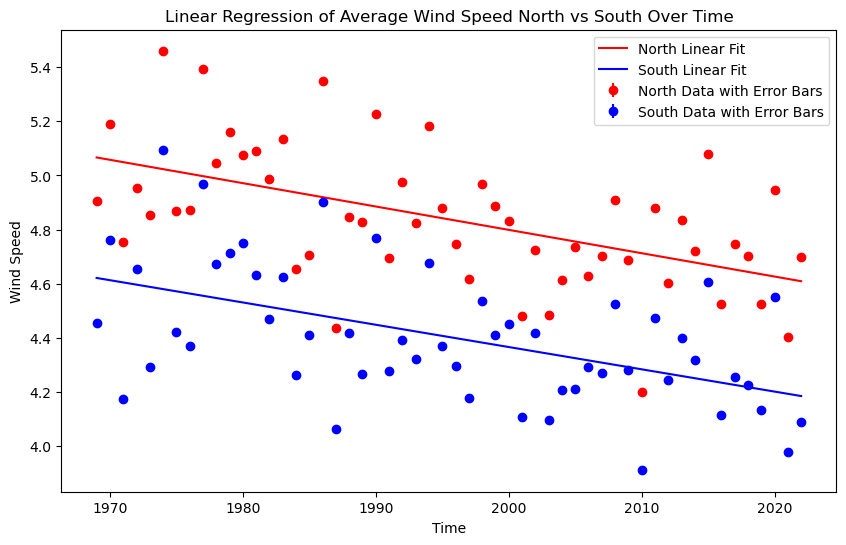

In [13]:
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Wind\*.nc", parallel=True)

wind_array = np.array(data['sfcWind'])
lat = np.array(data['latitude'])
err = 0.002

northern_lat_threshold = 54.0
northern_lat_index = np.where(lat >= northern_lat_threshold)[0][0]

num_years = 648 // 12
wind_reshaped = wind_array[:num_years * 12].reshape(num_years, 12, -1)  

wind_mean_north = np.nanmean(wind_reshaped[:, :, northern_lat_index:], axis=(1, 2))

time = np.arange(1969,2023)

# Define the latitude threshold for southern U.K.
southern_lat_threshold = 54.0

# Find the index where latitude crosses the threshold
southern_lat_index = np.where(lat >= southern_lat_threshold)[0][0]

# Calculate the mean winderature for each year in the southern U.K.
wind_mean_south = np.empty(num_years)
for i in range(num_years):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    wind_year = wind_array[start_idx:end_idx, :southern_lat_index, :]
    wind_mean_south[i] = np.nanmean(wind_year)

X_with_constant_north = sm.add_constant(time)
X_with_constant_south = sm.add_constant(time)    

# Performing Ordinary Least Squares regression
weights_north = 1 / np.square(err)
model_north = sm.WLS(wind_mean_north, X_with_constant_north, weights=weights_north)
results_north = model_north.fit()

# Extracting information from the regression results
slope_north = results_north.params[1]  # Index 1 corresponds to the slope coefficient
intercept_north = results_north.params[0]  # Index 0 corresponds to the intercept
slope_error_north = results_north.bse[1]
intercept_error_north = results_north.bse[0]

print(f'The rate of change of the annual northern wind speed is {slope_north:.5f} ± {slope_error_north:.5f} mm')
conf_int_north = results_north.conf_int(alpha=0.05)  
lower_bound_north, upper_bound_north = conf_int_north[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound_north:.2f}, {upper_bound_north:.2f}) m/s')

# Printing results
t_statistic_north = results_north.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_north = len(wind_mean_north)- 2
p_value_north = 2 * (1 - stats.t.cdf(np.abs(t_statistic_north), df=degrees_of_freedom_north))

null_hypothesis_value = 0
z_score_north = (slope_north - null_hypothesis_value) / results_north.bse[1]

print('T statistic North', t_statistic_north)
print('P-value North', p_value_north)
print('Z-score North', z_score_north)


# Performing Ordinary Least Squares regression
weights_south = 1 / np.square(err)
model_south = sm.WLS(wind_mean_south, X_with_constant_south, weights=weights_south)
results_south = model_south.fit()

# Extracting information from the regression results
slope_south = results_south.params[1]  # Index 1 corresponds to the slope coefficient
intercept_south = results_south.params[0]  # Index 0 corresponds to the intercept
slope_error_south = results_south.bse[1]
intercept_error_south = results_south.bse[0]

print(f'The rate of change of the annual southern wind speed is {slope_south:.5f} ± {slope_error_south:.5f} m/s')
conf_int_south = results_south.conf_int(alpha=0.05)  
lower_bound_south, upper_bound_south = conf_int_south[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound_south:.2f}, {upper_bound_south:.2f}) mm')

# Printing results
t_statistic_south = results_south.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_south = len(wind_mean_south)- 2
p_value_south = 2 * (1 - stats.t.cdf(np.abs(t_statistic_south), df=degrees_of_freedom_south))

null_hypothesis_value = 0
z_score_south = (slope_south - null_hypothesis_value) / results_south.bse[1]

print('T statistic South', t_statistic_south)
print('P-value South', p_value_south)
print('Z-score South', z_score_south)


plt.figure(figsize=(10, 6))

# Scatter plot of the data
plt.errorbar(time, wind_mean_north, yerr=err, fmt='o', color='red', label='North Data with Error Bars')

# Plotting the regression line
plt.plot(time, results_north.fittedvalues, color='red', label='North Linear Fit')

plt.errorbar(time, wind_mean_south, yerr=err, fmt='o', color='blue', label='South Data with Error Bars')

# Plotting the regression line
plt.plot(time, results_south.fittedvalues, color='blue', label='South Linear Fit')


plt.title('Linear Regression of Average Wind Speed North vs South Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()


## London

The rate of change of the annual London temperature is 0.01427 ± 0.00118 mm
95% Confidence Interval for the slope: (0.01, 0.02) m/s
T statistic London 12.112535454995621
P-value London 0.0
Z-score London 12.112535454995621
The rate of change of the annual temperature for rest of U.K. is 0.00947 ± 0.00102 m/s
95% Confidence Interval for the slope: (0.01, 0.01) mm
T statistic Rest 9.285699139471008
P-value Rest 4.440892098500626e-16
Z-score Rest 9.285699139471008


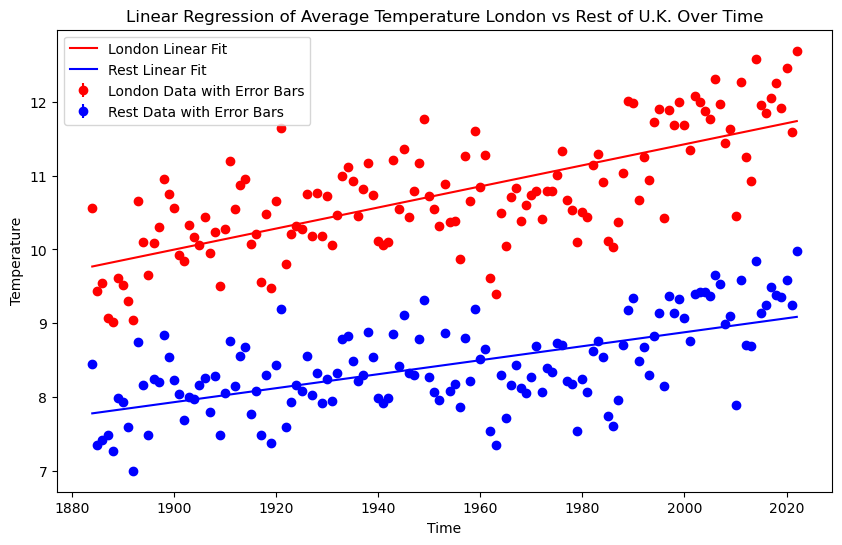

In [14]:
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)
tas = np.array(data['tas'])

temp = block_reduce(tas, block_size=(12,1,1), func=np.mean, cval=np.mean(tas))

time = np.arange(1884,2023)

London = temp[:,23,62]

rest = np.copy(temp)
rest[:, 23, 62] = np.nan 

rest = np.nanmean(rest, axis=(1, 2))

err = 0.001

X_with_constant_London = sm.add_constant(time)
X_with_constant_rest = sm.add_constant(time)    

# Performing Ordinary Least Squares regression
weights_London = 1 / np.square(err)
model_London = sm.WLS(London, X_with_constant_London, weights=weights_London)
results_London = model_London.fit()

# Extracting information from the regression results
slope_London = results_London.params[1]  # Index 1 corresponds to the slope coefficient
intercept_London = results_London.params[0]  # Index 0 corresponds to the intercept
slope_error_London = results_London.bse[1]
intercept_error_London = results_London.bse[0]

print(f'The rate of change of the annual London temperature is {slope_London:.5f} ± {slope_error_London:.5f} m/s')
conf_int_London = results_London.conf_int(alpha=0.05)  
lower_bound_London, upper_bound_London = conf_int_London[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound_London:.2f}, {upper_bound_London:.2f})')

# Printing results
t_statistic_London = results_London.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_London = len(London)- 2
p_value_London = 2 * (1 - stats.t.cdf(np.abs(t_statistic_London), df=degrees_of_freedom_London))

null_hypothesis_value = 0
z_score_London = (slope_London - null_hypothesis_value) / results_London.bse[1]

print('T statistic London', t_statistic_London)
print('P-value London', p_value_London)
print('Z-score London', z_score_London)


# Performing Ordinary Least Squares regression
weights_rest = 1 / np.square(err)
model_rest = sm.WLS(rest, X_with_constant_rest, weights=weights_rest)
results_rest = model_rest.fit()

# Extracting information from the regression results
slope_rest = results_rest.params[1]  # Index 1 corresponds to the slope coefficient
intercept_rest = results_rest.params[0]  # Index 0 corresponds to the intercept
slope_error_rest = results_rest.bse[1]
intercept_error_rest = results_rest.bse[0]

print(f'The rate of change of the annual temperature for rest of U.K. is {slope_rest:.5f} ± {slope_error_rest:.5f} m/s')
conf_int_rest = results_rest.conf_int(alpha=0.05)  
lower_bound_rest, upper_bound_rest = conf_int_rest[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound_rest:.2f}, {upper_bound_rest:.2f})')

# Printing results
t_statistic_rest = results_rest.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_rest = len(rest)- 2
p_value_rest = 2 * (1 - stats.t.cdf(np.abs(t_statistic_rest), df=degrees_of_freedom_rest))

null_hypothesis_value = 0
z_score_rest = (slope_rest - null_hypothesis_value) / results_rest.bse[1]

print('T statistic Rest', t_statistic_rest)
print('P-value Rest', p_value_rest)
print('Z-score Rest', z_score_rest)


plt.figure(figsize=(10, 6))

# Scatter plot of the data
plt.errorbar(time, London, yerr=err, fmt='o', color='red', label='London Data with Error Bars')

# Plotting the regression line
plt.plot(time, results_London.fittedvalues, color='red', label='London Linear Fit')

plt.errorbar(time, rest, yerr=err, fmt='o', color='blue', label='Rest Data with Error Bars')

# Plotting the regression line
plt.plot(time, results_rest.fittedvalues, color='blue', label='Rest Linear Fit')


plt.title('Linear Regression of Average Temperature London vs Rest of U.K. Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()